In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heartdisease_data.csv",names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang'
                                              ,'oldpeak','slope',
                                              'ca','thal','targ'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,targ
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
df.shape

(200, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
targ        0
dtype: int64

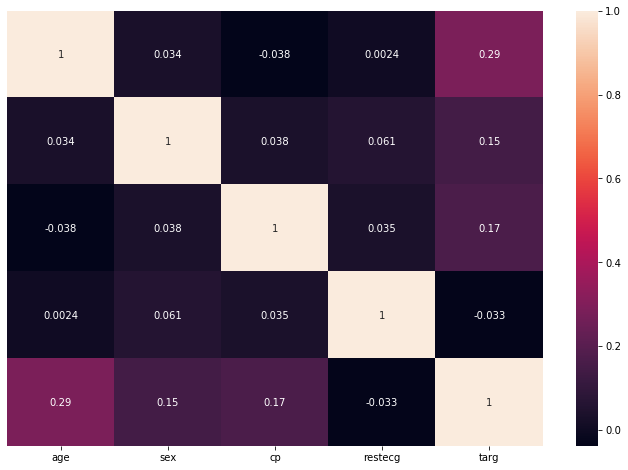

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),yticklabels=False,annot=True)

In [6]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
targ         int64
dtype: object

In [7]:

for col in df.columns:
    if df[col].dtypes=='object':
        print(df[col].value_counts())
        print()

?      56
120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
124     4
128     4
126     4
170     4
134     4
136     4
144     4
158     3
132     3
112     2
152     2
155     2
138     2
116     2
104     2
154     2
180     2
125     2
118     1
172     1
178     1
146     1
96      1
190     1
135     1
100     1
106     1
127     1
156     1
0       1
102     1
114     1
Name: trestbps, dtype: int64

0      49
?       7
258     4
220     4
203     4
       ..
230     1
273     1
281     1
311     1
271     1
Name: chol, Length: 100, dtype: int64

0    125
1     68
?      7
Name: fbs, dtype: int64

?      53
120    12
140    12
110     8
112     6
130     6
150     4
100     4
128     4
105     4
160     4
118     4
148     3
122     3
102     3
108     3
86      3
125     3
135     3
106     3
117     3
84      3
127     2
129     2
96      2
154     2
165     2
180     2
98      2
119     2
111     2
138     2
80      2
121     1
145     1
151     1

In [8]:
#replace ? with nan
df['trestbps'].replace('?', np.nan, inplace= True)
df['chol'].replace('?', np.nan, inplace= True)
df['fbs'].replace('?', np.nan, inplace= True)
df['restecg'].replace('?', np.nan, inplace= True)
df['thalach'].replace('?', np.nan, inplace= True)
df['exang'].replace('?', np.nan, inplace= True)
df['oldpeak'].replace('?', np.nan, inplace= True)
df['slope'].replace('?', np.nan, inplace= True)
df['ca'].replace('?', np.nan, inplace= True)
df['thal'].replace('?', np.nan, inplace= True)
df['targ'].replace('?', np.nan, inplace= True)

In [9]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
targ          0
dtype: int64

In [10]:
#converting object type data to numberic type data
#for col in df.columns:
   # if df[col].dtypes=='object':
     #   df[col]=pd.to_numeric(df[col])

In [11]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
targ         int64
dtype: object

# filling nan value with mean and mode for catogorical value

In [15]:
df['trestbps']=pd.to_numeric(df['trestbps'])
mean_value=df['trestbps'].mean()
df['trestbps']=df['trestbps'].fillna(mean_value)

In [17]:
df['chol']=pd.to_numeric(df['chol'])
mean_value=df['chol'].mean()
df['chol']=df['chol'].fillna(mean_value)

In [18]:
mean_value=df['fbs'].mode()[0]
df['fbs']=df['fbs'].fillna(mean_value)

In [61]:
#df['thalach']=pd.to_numeric(df['thalach'])
mean_value=df['thalach'].median()
df['thalach']=df['thalach'].fillna(mean_value)

In [60]:
df['thalach'].value_counts()

120.0    53
120      12
140      12
110       8
112       6
130       6
118       4
150       4
100       4
128       4
105       4
160       4
148       3
102       3
108       3
86        3
125       3
122       3
106       3
135       3
117       3
84        3
165       2
127       2
129       2
96        2
154       2
180       2
119       2
98        2
111       2
138       2
80        2
99        1
121       1
145       1
149       1
124       1
151       1
155       1
107       1
126       1
93        1
141       1
94        1
113       1
69        1
97        1
132       1
162       1
88        1
161       1
144       1
159       1
73        1
133       1
131       1
157       1
115       1
123       1
Name: thalach, dtype: int64

In [44]:
mean_value=df['exang'].mode()
df['exang']=df['exang'].fillna(mean_value)

In [45]:
df['exang'].value_counts()

1      95
1.0    53
0      52
Name: exang, dtype: int64

In [47]:
df['oldpeak']=pd.to_numeric(df['oldpeak'])
mean_value=df['oldpeak'].mean()
df['oldpeak']=df['oldpeak'].fillna(mean_value)

In [49]:
df['oldpeak'].value_counts()

 1.320833    56
 0.000000    40
 2.000000    25
 1.500000    21
 1.000000    18
 3.000000    13
 2.500000     9
 0.500000     7
 4.000000     4
 1.300000     2
 1.700000     1
 0.800000     1
 1.600000     1
 3.500000     1
-0.500000     1
Name: oldpeak, dtype: int64

In [50]:
mean_value=df['trestbps'].mean()
df['trestbps']=df['trestbps'].fillna(mean_value)

In [57]:
mean_value=df['slope'].median()
df['slope']=df['slope'].fillna(mean_value)

In [72]:
mean_value=df['thal'].mode()
df['thal']=df['thal'].fillna(mean_value)

In [73]:
df['thal'].value_counts()

7.0    166
7       22
6        8
3        4
Name: thal, dtype: int64

In [ ]:
#fill null value with zero 
#df['thal'].replace(np.nan, 0, inplace= True)

In [53]:
#99% ca data is missing so we can delete ca columns
del df['ca']

In [64]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
targ        0
dtype: int64

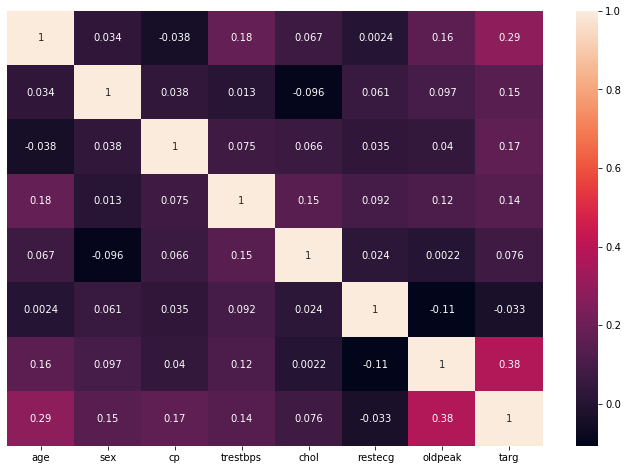

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),yticklabels=False,annot=True)

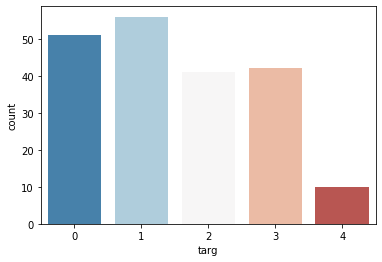

In [75]:
sns.countplot(x='targ',data=df,palette='RdBu_r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF1645BE48>,
      dtype=object)

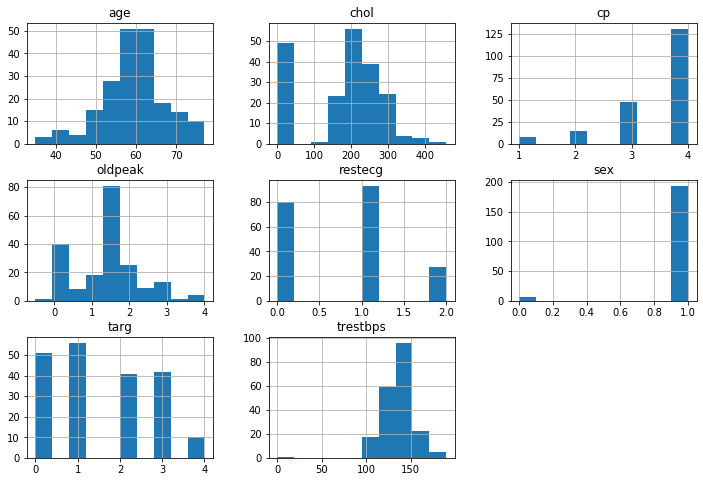

In [76]:
df.hist(figsize=(12,8))

In [78]:
#df.skew()

In [81]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [82]:
x = df.drop(['targ'], axis = 1)
x.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.468421,1,4,0.342421,0.727226,0,1,-0.534016,1,1.795117,2,7
1,-1.969933,1,4,-0.206673,0.270774,0,1,0.262627,0,-1.412040,2,7


In [133]:
x.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.423414
slope       0.210521
thal       -5.920627
dtype: float64

In [83]:
y = df['targ']
y.head(2)

0    2
1    0
Name: targ, dtype: int64

In [118]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=6)

In [122]:
model=[SVC(),DecisionTreeClassifier(),AdaBoostClassifier(),RandomForestClassifier()]

In [123]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    score=f1_score(pred,y_test,average='macro')
    print("f1 score: ","model name: ", m ,score)
    print("\n")
    

f1 score:  model name:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.18847290640394088


f1 score:  model name:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 0.27163947163947166


f1 score:  model name:  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 0.29030595813204507


f1 score:  model name:  RandomForestClassifier(boo

In [107]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
def maxf1(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(40,95):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=r_state)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        tem=f1_score(y_test,pred,average='macro')
        if tem>maxf:
            maxf=tem
            rs=r_state  
    print("maximum f1 score ",rs,'it is',maxf) 
    

In [99]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':['linear','rbf','poly'],"C":[0.001,0.1,.5,.9,1,5,9.5,10,11]}
gd=GridSearchCV(svc,parameters,cv=5,scoring='f1_micro')
gd.fit(x,y)
gd.best_params_

{'C': 0.9, 'kernel': 'poly'}

In [108]:
svc=SVC(kernel="rbf",C=0.9)
maxf1(svc,x,y)

maximum f1 score  68 it is 0.33383529179421345


In [114]:
from sklearn.tree import DecisionTreeClassifier
parameters={'min_samples_leaf':[1,2,3,4],'min_samples_split':[2,3,4,5],'criterion':['gini','entropy']}
dc=DecisionTreeClassifier()
clf = GridSearchCV(dc, parameters, cv=5,scoring="f1_micro")
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 4}

In [116]:
dc=DecisionTreeClassifier(criterion= 'gini',
min_samples_leaf= 2,
min_samples_split= 4)
maxf1(dc,x,y)

maximum f1 score  74 it is 0.40408602150537637


In [125]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,200,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="f1_micro")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [127]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
maxf1(gb_clf,x,y)

maximum f1 score  78 it is 0.39685177567530505


In [131]:
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,20,40,80]}
rf=RandomForestClassifier()
gd=GridSearchCV(rf,parameters,cv=5,scoring="f1_micro")
gd.fit(x,y)
gd.best_params_

{'n_estimators': 20}

In [132]:
rf=RandomForestClassifier(n_estimators=20)
maxf1(rf,x,y)

maximum f1 score  89 it is 0.41018455228981543
